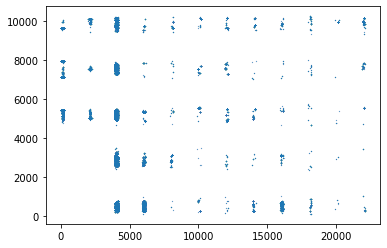

In [1]:
#import contour data 
import pandas as pd
data1 = pd.read_csv("/home/zxu4/CSE_MSE_RXF131/staging/mdle/C-lpbf/c-lpbf-ingestion/radi_list/666-715coord.csv").to_numpy()
#import LLNL data 
import pandas as pd
llblarr = pd.read_excel(r'/home/zxu4/CSE_MSE_RXF131/staging/mdle/C-lpbf/c-lpbf-ingestion/pore/180623_pyro_ML111417_start_end_turn_steady.xlsx')
#getting rid of image border 
trydf = data1[((data1[:,0]>5)&(data1[:,0]<(max(data1[:,0])-5)))&((data1[:,1]>5)&(data1[:,1]<(max(data1[:,1])-5)))]
#visualisation of the dataset that's going to analyzed
rawdata = trydf
#grouping points into pores
import scipy.cluster.hierarchy as hcluster
from sklearn.cluster import KMeans
import numpy as np
#number of pores per track
countpores = []
#coordinates of pores on each track
pores = []
for i in range(5):
    if (i != 0 & i!=4) :
        y1 = (max(rawdata[:,1])/8)*(2*i-1) 
        y2 = (max(rawdata[:,1])/8)*(2*i+1)
    elif i==0:
        y1 = min(rawdata[:,1])
        y2 = max(rawdata[:,1])/8
    else:
        y1 = (max(rawdata[:,1])/8)*(2*i-1) 
        y2 = max(rawdata[:,1])
    for p in range(12):
        if (p != 0 & p!=11):
            x1 = (max(rawdata[:,0])/22)*(2*p-1) 
            x2 = (max(rawdata[:,0])/22)*(2*p+1)
        elif p==0:
            x1 = min(rawdata[:,0])
            x2 = max(rawdata[:,0])/22
        else :
            x1 = (max(rawdata[:,0])/22)*(2*p-1)
            x2 = max(rawdata[:,0])
              
        b = rawdata[((x1<=rawdata[:,0]) & (rawdata[:,0]<=x2)) & ((y1<=rawdata[:,1]) & (rawdata[:,1]<=y2))]
        if b.size != 0:  
            clusterdata = np.column_stack((b[:,0] , b[:,1]))
            # clustering
            thresh = 10
            clusters = hcluster.fclusterdata(clusterdata, thresh, criterion="distance")
            countpores.append(len(set(clusters)))
            kmeans = KMeans(n_clusters= len(set(clusters)),algorithm = 'full')
            kmeans.fit_predict(clusterdata)
            pores.append(kmeans.cluster_centers_)

        else:
            countpores.append(0)
            pores.append("_")
countporesdf = pd.DataFrame()
countporesdf['nbrPoresPerTrck'] = countpores
countporesdf['poreCoord'] = pores
#dropping tracks not included into LLNL dataset
df3 = countporesdf.drop([0,1,12,13,24,25,36,37,48,49])
df3 = df3.reset_index(drop=True)
compare = df3['nbrPoresPerTrck']
poresllnlarr1 = np.array(poresllnl).reshape((10, 5))
poresllnlarr2 = np.transpose(poresllnlarr1)
poresarr1 = np.array(compare).reshape((5, 10))
poresllnlarr3 = poresllnlarr2.reshape((50,1))
poresarr2 = poresarr1.reshape((50,1))
#print r_2 score
print("R2_score:",sklearn.metrics.r2_score(poresllnlarr3,poresarr2))
cords = [por for por in pores if por != '_' ]
cordsnew = np.vstack(cords)
countporesdf.to_csv(r'/home/zxu4/CSE_MSE_RXF131/staging/mdle/C-lpbf/c-lpbf-ingestion/radi_list/666-715coord_and_porecount.csv')
np.savetxt(r'/home/zxu4/CSE_MSE_RXF131/staging/mdle/C-lpbf/c-lpbf-ingestion/radi_list/666-715centroid_coord.txt', cordsnew)

automate 

In [4]:
#import contour data 
import pandas as pd
data1 = pd.read_csv("/home/zxu4/CSE_MSE_RXF131/staging/mdle/C-lpbf/c-lpbf-ingestion/radi_list/666-715coord.csv").to_numpy()
#import LLNL data 
import pandas as pd
llblarr = pd.read_excel(r'/home/zxu4/CSE_MSE_RXF131/staging/mdle/C-lpbf/c-lpbf-ingestion/pore/180623_pyro_ML111417_start_end_turn_steady.xlsx')
#getting rid of image border 
trydf = data1[((data1[:,0]>5)&(data1[:,0]<(max(data1[:,0])-5)))&((data1[:,1]>5)&(data1[:,1]<(max(data1[:,1])-5)))]
#visualisation of the dataset that's going to analyzed
rawdata = trydf
#grouping points into pores
import sklearn.cluster
from math import sqrt
import scipy.cluster.hierarchy as hcluster
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import numpy as np
#number of pores per track
column_names = ["thresh", "r_2","mse","rmse","mae"]
hlcuster = pd.DataFrame(columns = column_names)
def ML(thresh):
    countpores = []
    #coordinates of pores on each track
    for i in range(5):
        if (i != 0 & i!=4) :
            y1 = (max(rawdata[:,1])/8)*(2*i-1) 
            y2 = (max(rawdata[:,1])/8)*(2*i+1)
        elif i==0:
            y1 = min(rawdata[:,1])
            y2 = max(rawdata[:,1])/8
        else:
            y1 = (max(rawdata[:,1])/8)*(2*i-1) 
            y2 = max(rawdata[:,1])
        for p in range(12):
            if (p != 0 & p!=11):
                x1 = (max(rawdata[:,0])/22)*(2*p-1) 
                x2 = (max(rawdata[:,0])/22)*(2*p+1)
            elif p==0:
                x1 = min(rawdata[:,0])
                x2 = max(rawdata[:,0])/22
            else :
                x1 = (max(rawdata[:,0])/22)*(2*p-1)
                x2 = max(rawdata[:,0])

            b = rawdata[((x1<=rawdata[:,0]) & (rawdata[:,0]<=x2)) & ((y1<=rawdata[:,1]) & (rawdata[:,1]<=y2))]
            if b.size != 0:  
                clusterdata = np.column_stack((b[:,0] , b[:,1]))
                # clustering
                clusters = hcluster.fclusterdata(clusterdata, thresh, criterion="distance")
                countpores.append(len(set(clusters)))
            else:
                countpores.append(0)
    #dropping tracks not included into LLNL dataset
    countporesdf = pd.DataFrame()
    poresllnl = llblarr[' nbrPoresPerTrck']
    countporesdf['nbrPoresPerTrck'] = countpores
    #dropping tracks not included into LLNL dataset
    df3 = countporesdf.drop([0,1,12,13,24,25,36,37,48,49])
    df3 = df3.reset_index(drop=True)
    compare = df3['nbrPoresPerTrck']
    poresllnlarr1 = np.array(poresllnl).reshape((10, 5))
    poresllnlarr2 = np.transpose(poresllnlarr1)
    poresarr1 = np.array(compare).reshape((5, 10))
    poresllnlarr3 = poresllnlarr2.reshape((50,1))
    poresarr2 = poresarr1.reshape((50,1))
    hlcuster.loc[len(hlcuster.index)] = ['%.1f' % thresh, '%.3f' % sklearn.metrics.r2_score(poresllnlarr3,poresarr2), '%.3f' % mean_squared_error(poresllnlarr3,poresarr2), '%.3f' % sqrt(mean_squared_error(poresllnlarr3,poresarr2)), '%.3f' % mean_absolute_error(poresllnlarr3,poresarr2)] 

for i in range (10,301):
    ML(i*0.1)
    

In [17]:
#import contour data 
import pandas as pd
data1 = pd.read_csv("/home/zxu4/CSE_MSE_RXF131/staging/mdle/C-lpbf/c-lpbf-ingestion/radi_list/666-715coord.csv").to_numpy()
#import LLNL data 
import pandas as pd
llblarr = pd.read_excel(r'/home/zxu4/CSE_MSE_RXF131/staging/mdle/C-lpbf/c-lpbf-ingestion/pore/180623_pyro_ML111417_start_end_turn_steady.xlsx')
#getting rid of image border 
trydf = data1[((data1[:,0]>5)&(data1[:,0]<(max(data1[:,0])-5)))&((data1[:,1]>5)&(data1[:,1]<(max(data1[:,1])-5)))]
#visualisation of the dataset that's going to analyzed
rawdata = trydf
rawdata.size

247942

In [18]:
type(rawdata)

numpy.ndarray

In [19]:
rawdata

array([[6.00000e+00, 7.96970e+03],
       [7.00000e+00, 7.96970e+03],
       [8.00000e+00, 7.96970e+03],
       ...,
       [4.10000e+03, 1.01683e+04],
       [4.09900e+03, 1.01683e+04],
       [4.09800e+03, 1.01683e+04]])

In [21]:
rawdata.size

247942

In [22]:
len(rawdata)

123971

In [2]:

#grouping points into pores
import sklearn.cluster
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn import metrics
from sklearn.cluster import MeanShift
#import contour data 
import pandas as pd
data1 = pd.read_csv("/home/zxu4/CSE_MSE_RXF131/staging/mdle/C-lpbf/c-lpbf-ingestion/radi_list/666-715coord.csv").to_numpy()
#import LLNL data 
llblarr = pd.read_excel(r'/home/zxu4/CSE_MSE_RXF131/staging/mdle/C-lpbf/c-lpbf-ingestion/pore/180623_pyro_ML111417_start_end_turn_steady.xlsx')
#getting rid of image border 
trydf = data1[((data1[:,0]>5)&(data1[:,0]<(max(data1[:,0])-5)))&((data1[:,1]>5)&(data1[:,1]<(max(data1[:,1])-5)))]
#visualisation of the dataset that's going to analyzed
rawdata = trydf

In [ ]:
countpores = []
def getx(i):
    if (i != 0 & i!=4) :
        y1 = (max(rawdata[:,1])/8)*(2*i-1) 
        y2 = (max(rawdata[:,1])/8)*(2*i+1)
    elif i==0:
        y1 = min(rawdata[:,1])
        y2 = max(rawdata[:,1])/8
    else:
        y1 = (max(rawdata[:,1])/8)*(2*i-1) 
        y2 = max(rawdata[:,1])

for i in range(5):
    print("1")
    if (i != 0 & i!=4) :
        y1 = (max(rawdata[:,1])/8)*(2*i-1) 
        y2 = (max(rawdata[:,1])/8)*(2*i+1)
    elif i==0:
        y1 = min(rawdata[:,1])
        y2 = max(rawdata[:,1])/8
    else:
        y1 = (max(rawdata[:,1])/8)*(2*i-1) 
        y2 = max(rawdata[:,1])
    for p in range(12):
        
        if (p != 0 & p!=11):
            x1 = (max(rawdata[:,0])/22)*(2*p-1)
            x2 = (max(rawdata[:,0])/22)*(2*p+1)
            print("2")
        elif p==0:
            x1 = min(rawdata[:,0])
            x2 = max(rawdata[:,0])/22
            print("2")
        else :
            x1 = (max(rawdata[:,0])/22)*(2*p-1)
            x2 = max(rawdata[:,0])
            print("2")
        b = rawdata[((x1<=rawdata[:,0]) & (rawdata[:,0]<=x2)) & ((y1<=rawdata[:,1]) & (rawdata[:,1]<=y2))]
        if b.size != 0:
            clusterdata = np.column_stack((b[:,0] , b[:,1]))
            # clustering
            ms = MeanShift()
            ms.fit(clusterdata)
            cluster_centers = ms.cluster_centers_
            # Number of clusters in labels, ignoring noise if present.
            countpores.append(len(cluster_centers))
        else:
            countpores.append(0)
#dropping tracks not included into LLNL dataset
countporesdf = pd.DataFrame()
poresllnl = llblarr[' nbrPoresPerTrck']
countporesdf['nbrPoresPerTrck'] = countpores
#dropping tracks not included into LLNL dataset
df3 = countporesdf.drop([0,1,12,13,24,25,36,37,48,49])
df3 = df3.reset_index(drop=True)
compare = df3['nbrPoresPerTrck']
poresllnlarr1 = np.array(poresllnl).reshape((10, 5))
poresllnlarr2 = np.transpose(poresllnlarr1)
poresarr1 = np.array(compare).reshape((5, 10))
poresllnlarr3 = poresllnlarr2.reshape((50,1))
poresarr2 = poresarr1.reshape((50,1))
print(thresh,"; R2_score:",sklearn.metrics.r2_score(poresllnlarr3,poresarr2),"sqr:",mean_squared_error(poresllnlarr3,poresarr2))

In [6]:
hlcuster.to_csv("/home/zxu4/CSE_MSE_RXF131/staging/mdle/C-lpbf/c-lpbf-ingestion/radi_list/ML_hluster.csv")

In [7]:
max(hlcuster.r_2)

'0.905'